In [15]:
# Import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

import ast
import contractions
import emoji
import re
import string 
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/botakoz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

[nltk_data] Downloading package punkt to /Users/botakoz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/botakoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /Users/botakoz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Read in the file
data = pd.read_csv('dataset/DatingAppReviewsDataset.csv')
data.head()
data.info()

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681994 entries, 0 to 681993
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  681994 non-null  int64 
 1   Name        681987 non-null  object
 2   Review      680609 non-null  object
 3   Rating      681994 non-null  int64 
 4   #ThumbsUp   681994 non-null  int64 
 5   Date&Time   681994 non-null  object
 6   App         681994 non-null  object
dtypes: int64(3), object(4)
memory usage: 36.4+ MB


In [17]:
# Drop unnecessary columns 
data.drop(columns=['#ThumbsUp'],inplace = True)
data.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
data.head()

,Id,Name,Review,Rating,Date&Time,App
0,0,linah sibanda,On this app i cant find a partner,5,18-02-2022 01:19,Tinder
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,18-02-2022 01:16,Tinder
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,18-02-2022 01:11,Tinder
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,18-02-2022 01:11,Tinder
4,4,Arthur Magamedov,Love it!,5,18-02-2022 01:06,Tinder


## DATA CLEANING

In [18]:
# ChECK the total rows and columns, and their datatypes
data.info()
# Check for duplicate rows if there are any 
data.duplicated().sum()
# Check for missing values in each column 
data.isnull().sum()
# Check for NA values in each column 
# data.isna().sum()
data[data['Name']=='Unknown'] 
data[data['Name'].str.contains('Jaydev Nishad', case=False, na=False)]
data[data['Id'] == 372332]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681994 entries, 0 to 681993
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         681994 non-null  int64 
 1   Name       681987 non-null  object
 2   Review     680609 non-null  object
 3   Rating     681994 non-null  int64 
 4   Date&Time  681994 non-null  object
 5   App        681994 non-null  object
dtypes: int64(2), object(4)
memory usage: 31.2+ MB


np.int64(0)

Id              0
Name            7
Review       1385
Rating          0
Date&Time       0
App             0
dtype: int64

,Id,Name,Review,Rating,Date&Time,App
74375,74375,Unknown,Worst app I have seen in my life doesn't open ...,1,10-12-2020 19:03,Tinder
184990,184990,Unknown,this app is actually good but worst part is af...,1,08-06-2019 12:38,Tinder
574311,47695,Unknown,Race filter missing You allow filtering of eve...,1,25-02-2020 04:23,Bumble


,Id,Name,Review,Rating,Date&Time,App
95608,95608,Jaydev Nishad,😠😑🤣🤣🤣,1,14-08-2020 20:50,Tinder


,Id,Name,Review,Rating,Date&Time,App
372332,372332,Jena Fernando,#geg,4,01-11-2016 20:55,Tinder


In [19]:
# Drop the missing reviews
data = data.dropna(subset=['Review'])

# Replace missing names with unknown 
data['Name'] = data['Name'].fillna('Unknown')

# Convert the column to datetime dtype
data['Date&Time'] = pd.to_datetime(data['Date&Time'], errors='coerce')

data.info()
data.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 680609 entries, 0 to 681993
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Id         680609 non-null  int64         
 1   Name       680609 non-null  object        
 2   Review     680609 non-null  object        
 3   Rating     680609 non-null  int64         
 4   Date&Time  680609 non-null  datetime64[ns]
 5   App        680609 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 36.3+ MB


/var/folders/gl/0z9c8j8x38145vq7j3xh6f640000gn/T/ipykernel_29855/2687011836.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date&Time'] = pd.to_datetime(data['Date&Time'], errors='coerce')


,Id,Name,Review,Rating,Date&Time,App
0,0,linah sibanda,On this app i cant find a partner,5,2022-02-18 01:19:00,Tinder
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,2022-02-18 01:16:00,Tinder
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,2022-02-18 01:11:00,Tinder
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,2022-02-18 01:11:00,Tinder
4,4,Arthur Magamedov,Love it!,5,2022-02-18 01:06:00,Tinder


Some reviews are consisted of emojis. Since standard text tokenization methods tend to ignore non-alphabetic symbols, these reviews will result in empty token lists.

In [20]:
# Check for reviews with emojis
emoji_count = data['Review'].apply(lambda x: any(char in emoji.EMOJI_DATA for char in x)).sum()
emoji_count

np.int64(26783)

In [21]:
# Convert emojis to descriptive text 
data['Review'] = data['Review'].apply(lambda x: emoji.demojize(x))
data[data['Name'].str.contains('Jaydev Nishad', case=False, na=False)]

,Id,Name,Review,Rating,Date&Time,App
95608,95608,Jaydev Nishad,:angry_face::expressionless_face::rolling_on_t...,1,2020-08-14 20:50:00,Tinder


In [22]:
# Replace underscores with spaces to make the converted text compatible with VADER model
data['Review'] = data['Review'].str.replace('_', ' ')
data[data['Name'].str.contains('Jaydev Nishad', case=False, na=False)]

,Id,Name,Review,Rating,Date&Time,App
95608,95608,Jaydev Nishad,:angry face::expressionless face::rolling on t...,1,2020-08-14 20:50:00,Tinder


To ensure consistent processing, these emoji-only reviews converted to text labels using the emoji library

In [23]:
# Check for unique values in the 'App' column
data['App'].unique()

# Check the count of each rating in the 'Rating' column 
data['Rating'].value_counts()

array(['Tinder', 'Bumble', 'Hinge'], dtype=object)

Rating
1    251842
5    232732
4     86958
3     56850
2     52226
0         1
Name: count, dtype: int64

In [24]:
# Filter out row where 'Rating' is 0
data = data[data['Rating'] != 0]

## Rating to Sentiment

Initially sentiment classification was split into three-class (positive, neutral, negative). However, during exploratory analysis I noticed that neutral reviews often overlapped with negative sentiment, and many neutral reviews lacked strong sentiment indicators. After running baseline models with accuracy around 60%, the classification was restructured as binary classification task to simplify the task and improve model performance, by merging neutral and negative into a single 'negative' class. This adjustment will lead to a significant increase in model accuracy, indicating that the neutral class was contribution noise rather than usefull insight.

In [25]:
def rating_to_sentiment(rating):
    if rating in [1, 2, 3]:
        return 'negative'
    # elif rating == 3:
    #     return 'neutral'
    else:
        return 'positive'

# Create a new column 'Sentiment'
data['Sentiment'] = data['Rating'].apply(rating_to_sentiment)

data.head()


,Id,Name,Review,Rating,Date&Time,App,Sentiment
0,0,linah sibanda,On this app i cant find a partner,5,2022-02-18 01:19:00,Tinder,positive
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,2022-02-18 01:16:00,Tinder,negative
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,2022-02-18 01:11:00,Tinder,negative
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,2022-02-18 01:11:00,Tinder,negative
4,4,Arthur Magamedov,Love it!,5,2022-02-18 01:06:00,Tinder,positive


In [26]:
# Drop 'Rating' column
data.drop(columns=['Rating'],inplace = True)
data.head()

,Id,Name,Review,Date&Time,App,Sentiment
0,0,linah sibanda,On this app i cant find a partner,2022-02-18 01:19:00,Tinder,positive
1,1,Norman Johnson,Tinder would be so much better if we could spe...,2022-02-18 01:16:00,Tinder,negative
2,2,David Hume,Still doesn't correctly notify matches or mess...,2022-02-18 01:11:00,Tinder,negative
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2022-02-18 01:11:00,Tinder,negative
4,4,Arthur Magamedov,Love it!,2022-02-18 01:06:00,Tinder,positive


## EDA BEFORE PREPROCESSING

Text(0.5, 0, 'Sentiments')

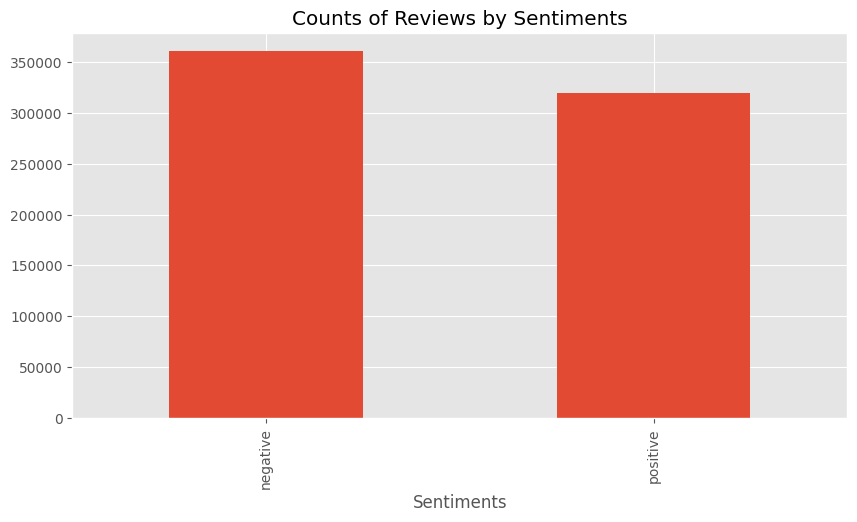

In [27]:
# Plot the count of reviews for each rating
review_by_rating = data['Sentiment'].value_counts().sort_index().plot(kind = 'bar', 
                                              title = 'Counts of Reviews by Sentiments',
                                              figsize = (10,5))
review_by_rating.set_xlabel('Sentiments')
plt.show()

The dataset shows a class imbalance, with a higher proportion of negative reviews compared to positive ones. To address this imbalance and to reduce computational overhead during both exploratory analysis and model training, a balanced subset was created by randomly sampling 25,000 reviews from each sentiment class. This approach ensures the models receive equal exposure to both classes, while also creating a more manageable dataset size for faster processing. While balancing the dataset can lead to lower accuracy compared to working with the full imbalanced set, it produces a more reliable measure of the model's true performance across both classes, avoiding overfitting to the negative sentiment. Given the objective of this project, the sampled dataset will provide sufficient data to build and evaluate a reliable sentiment classifier. 

In [28]:
# # Randomly sample 10,000 rows
# df_list = []

# Sample balanced set
df = (
    data.groupby('Sentiment', group_keys=False)
    .apply(lambda x: x.sample(25000, random_state=42))
)
print(df['Sentiment'].value_counts())


# for sentiment_value in [1, 2, 3, 4, 5]:
#     df_rating = data[data['Rating'] == rating_value]
#     df_rating_sample = df_rating.sample(n=10000, random_state=42)
#     df_list.append(df_rating_sample)

# # Form the new DatafRame
# df = pd.concat(df_list, axis=0).reset_index(drop=True)

# print(df['Rating'].value_counts())
df.info()

Sentiment
negative    25000
positive    25000
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 111028 to 93121
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         50000 non-null  int64         
 1   Name       50000 non-null  object        
 2   Review     50000 non-null  object        
 3   Date&Time  50000 non-null  datetime64[ns]
 4   App        50000 non-null  object        
 5   Sentiment  50000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.7+ MB


/var/folders/gl/0z9c8j8x38145vq7j3xh6f640000gn/T/ipykernel_29855/1723471058.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(25000, random_state=42))


In [29]:
# SAVE THE CLEaned DataFrame to a new CSV file
df.to_csv('dataset/cleaned_DatingAppReviewsDataset.csv', index=False)